## 코골이 검출 알고리즘

1. csv는 "년월일 시간", "사운드값 0~1"로 구성되어 있음
2. 1초에 20개의 데이터가 수집되어있음
3. 사운드값 0.8 이상이 감지된 경우 그 이후부터 15초(=이후 300줄)까지 데이터를 가져와 데이터를 보여줌


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### save_graph

- 읽어온 csv의 DataFrame을 가지고 1.0 이상의 코골이 음량이 들어간 것을 캐치
- 그 후 그래프를 그린 후 저장
- 그려진 plot은 다시 지운 후 재사용
- 모든 작업이 끝나면 plot을 닫음

In [2]:
def save_graph(dataframe, index_list, limits=20):
    index = index_list[0]
    i = 1
    while i <= limits:
        plt.plot(dataframe.iloc[index:index+300, -1])
        plt.title("snoring data")
        plt.xlabel("time")
        plt.ylabel("snoring rate")
        plt.xticks(ticks=np.linspace(index, index+300, 15), labels=list(map(lambda x: datetime.strptime(
            str(x), "%Y%m%d%H%M%S"), df.iloc[index:index+300:20, 0].to_numpy())), rotation=90)
        plt.savefig(f"./img/figure{i}.jpg")
        plt.cla()   # 플로팅 초기화
        next_array = np.where(index_list > index+300)[0]
        if next_array.size <= 0:
            break
        index = index_list[next_array[0]]
        i += 1

    plt.close()


    


### get_snoring_freq

- 읽어온 csv의 DataFrame을 가지고 1.0 이상의 코골이 음량이 들어간 것을 캐치
- 해당 음량부터 이후 300개 까지의 값 사이의 시간을 구하여 코골이 빈도를 저장
- 0~24시 까지의 코골이 빈도를 나타내는 **리스트**를 리턴

In [9]:
장def get_snoring_freq(dataframe, index_list):
    index = index_list[0]
    freq_list = [0]*24
    while True:
        freq_list[int(dataframe["year"][index]%1000000/10000)-1] += 1
        next_array = np.where(index_list > index+300)[0]
        if next_array.size <= 0:
            break
        index = index_list[next_array[0]]
    return freq_list

In [14]:
url = "snoring.csv"
df = pd.read_csv(url, names=["year", "time", "sound value"], skiprows=[0, 0])
snoring_list = df.index[df["sound value"] > 1.0].to_numpy()

### 코골이 값이 1.0 이상인 행의 개수가 12947개임

In [15]:
snoring_list.size

12947

## save_graph를 사용하기 앞서 다음의 그래프가 저장됨

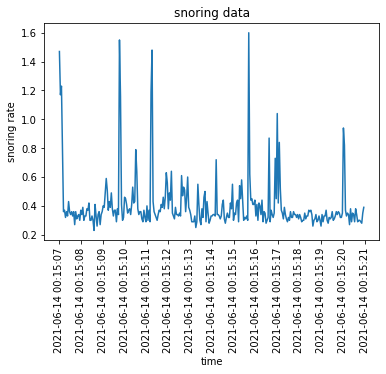

In [16]:
index = snoring_list[0]
plt.plot(df.iloc[index:index+300, -1])
plt.title("snoring data")
plt.xlabel("time")
plt.ylabel("snoring rate")

# 여기서 _ 라는 변수에 저장한 이유는 plt.xticks 함수가 레이블을 설정하기위해 반복해서 텍스트 값을 리턴하기 때문에 출력결과가 더러워져서 쓰레기 변수로 저장하게 둚
_ = plt.xticks(ticks=np.linspace(index, index+300, 15), labels=list(map(lambda x: datetime.strptime(
    str(x), "%Y%m%d%H%M%S"), df.iloc[index:index+300:20, 0].to_numpy())), rotation=90)


In [6]:
save_graph(df, snoring_list)

## 각 코골이 측정에 대한 빈도 수를 그래프로 그린 결과는 다음과 같음

In [26]:
freq_list = get_snoring_freq(df, snoring_list)  # 각 시간대 별 빈도 수
index_list = list(map(lambda x: f"{x}시~{x+1}시", range(24)))   # 판다스에 그리기 위해 사용할 index리스트
pd.Series(freq_list, index=index_list)


0시~1시       28
1시~2시       76
2시~3시       23
3시~4시       12
4시~5시       23
5시~6시       11
6시~7시       10
7시~8시       38
8시~9시       16
9시~10시      14
10시~11시     53
11시~12시     41
12시~13시     70
13시~14시    139
14시~15시    165
15시~16시     54
16시~17시     70
17시~18시      3
18시~19시      2
19시~20시     23
20시~21시     13
21시~22시      4
22시~23시     11
23시~24시     23
dtype: int64

### 코골이 값이 1.0 이상인 행의 개수가 `12947`개였으나 그려지는 그래프의 개수는 `922`개임

In [24]:
sum(freq_list)  # 그려지는 그래프의 개수

922